In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics as stats
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
import numpy as np
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
import tensorflow as tf
import matplotlib as mpl
from cycler import cycler
import re
import emoji
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
import re
import string
import nltk
sns.despine()
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

import emoji
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords


<Figure size 640x480 with 0 Axes>

**1. Data Exploration & Preprocessing**

In [4]:
# Baca dan tampilkan data
df = pd.read_csv('train1.csv')


print(df)

      entry_id                                            text  \
0            0                       I would love to 🔪 some 👳🏾   
1            2                       I would love to 🔪 some 👨🏿   
2            3                          I would love to 🔪some🦊   
3            5                                    👳🏽 make me 🤢   
4            6         literally all 👨🏿 men act like gentlemen   
...        ...                                             ...   
4752      5551                What crap do you think this is 🈺   
4753       785  can you imagine how they can eat 🍅 soup...yuk!   
4754      4416                         🎌spreading the covid-19   
4755      5883                      my dad said I hate pakis 😧   
4756      2253                              women are actual 👼   

                     type                        target  round.base round.set  \
0     threateninglanguage  ['asi.south', 'arab', 'mus']           5        5a   
1     threateninglanguage                    

data cleanng

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

entry_id        0
text            0
type            0
target          0
round.base      0
round.set       0
set             0
split           0
label_gold      0
matched_text    0
matched_id      0
dtype: int64
      entry_id                                               text  type  \
4736      3961  We know who to blame for the lack of 🐬🐋 *cough...  none   

        target  round.base round.set           set  split  label_gold  \
4736  ['none']           6        6b  perturbation  train           0   

                                           matched_text  matched_id  
4736  We know who to blame for the lack of 🐬🐋 *cough...        3960  


In [ ]:
# Baca dan tampilkan data
df_test = pd.read_csv('test1.csv')


print(df_test)

     entry_id                                               text  \
0           1                         I would love to 👏🏽 some 👳🏾   
1           8     all women are interested in is 💸💸💸 - incorrect   
2          17                       you cunts are 🅿️r🅾️ 👩‍❤️‍💋‍👩   
3          25                                        🚯means no 💩   
4          30                                     rah can u 😥not   
..        ...                                                ...   
588      5862  we need way more 💂‍♂️👮 at the border to stop t...   
589      5869  we need👷‍♂️👷 to build houses for the immigrant...   
590      5888                               you are hispanic? 🤨🤧   
591      5895  I speak to my family and tell them I hate gays...   
592      5912                       just let the refugees in 😡😡😡   

                     type      target  round.base round.set           set  \
0                    none    ['none']           5        5b  perturbation   
1                    none    

In [ ]:
# Baca dan tampilkan data
df_validation = pd.read_csv('C:/tasi23234105/validation.csv')


print(df_validation)

     entry_id                                               text        type  \
0           4                                        🐀 make me 🤢        none   
1           9       all women are interested in is 💸💸💸 - correct  derogation   
2          12                             my 🔌hates black people        none   
3          16                                    you cunts are 🚮        none   
4          32                                           😴shurrrp        none   
..        ...                                                ...         ...   
586      5864  cant believe every handman on checkatrade is 😡???        none   
587      5874  "I was born with a penis but I have always bee...        none   
588      5883                         my dad said I hate pakis 😧        none   
589      5884                        my dad he hates maccies 🤣🤣🤣        none   
590      5896  I went to the shop and called it a Paki shop, ...   animosity   

                target  round.base roun

In [ ]:
# Drop kolom yang ditentukan
df_dropped = df.drop(['entry_id', 'type', 'target', 'round.base', 'round.set', 'set', 'split', 'matched_text', 'matched_id'], axis=1)

# Menyimpan DataFrame yang sudah dijatuhkan kolomnya ke file CSV
csv_file_path = 'train.csv'
df_dropped.to_csv(csv_file_path, index=False)

,text,label_gold
0,I would love to 🔪 some 👳🏾,1
1,I would love to 🔪 some 👨🏿,1
2,I would love to 🔪some🦊,0
3,👳🏽 make me 🤢,1
4,literally all 👨🏿 men act like gentlemen,0
...,...,...
4752,What crap do you think this is 🈺,1
4753,can you imagine how they can eat 🍅 soup...yuk!,0
4754,🎌spreading the covid-19,1
4755,my dad said I hate pakis 😧,0


In [7]:
df_test = df_test.drop(['entry_id', 'type', 'target', 'round.base', 'round.set', 'set', 'split', 'matched_text', 'matched_id'], axis=1)
df_test

,text,label_gold
0,I would love to 👏🏽 some 👳🏾,0
1,all women are interested in is 💸💸💸 - incorrect,0
2,you cunts are 🅿️r🅾️ 👩‍❤️‍💋‍👩,1
3,🚯means no 💩,0
4,rah can u 😥not,0
...,...,...
588,we need way more 💂‍♂️👮 at the border to stop t...,1
589,we need👷‍♂️👷 to build houses for the immigrant...,1
590,you are hispanic? 🤨🤧,1
591,I speak to my family and tell them I hate gays...,0


In [8]:
df_validation = df_validation.drop(['entry_id', 'type', 'target', 'round.base', 'round.set', 'set', 'split', 'matched_text', 'matched_id'], axis=1)
df_validation

,text,label_gold
0,🐀 make me 🤢,0
1,all women are interested in is 💸💸💸 - correct,1
2,my 🔌hates black people,0
3,you cunts are 🚮,0
4,😴shurrrp,0
...,...,...
586,cant believe every handman on checkatrade is 😡???,0
587,"""I was born with a penis but I have always bee...",0
588,my dad said I hate pakis 😧,0
589,my dad he hates maccies 🤣🤣🤣,0


In [9]:
#info dataset
df.info()
df_test.info()
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        4757 non-null   object
 1   label_gold  4757 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 74.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        593 non-null    object
 1   label_gold  593 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        591 non-null    object
 1   label_gold  591 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.4+ KB


In [10]:
# Checking for null values
df.isnull().values.any()
df_test.isnull().values.any()
df_validation.isnull().values.any()

False

In [11]:
All = df.shape[0]
hatespeech = df[df['label_gold'] == 1]
non_hate_speech = df[df['label_gold'] == 0]

In [12]:
totalhatespeech = len(hatespeech)/All
totalnonhatespeech = len(non_hate_speech)/All
print('hatespeech :', totalhatespeech * 100, '%')
print('non hatespeech :', totalnonhatespeech * 100, '%')

hatespeech : 50.32583561067901 %
non hatespeech : 49.674164389321 %


In [13]:
# Melihat jumlah masing-masing tipe
df['label_gold'].value_counts()

label_gold
1    2394
0    2363
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24028\86505274.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes = pd.value_counts(df['label_gold'], sort=True)


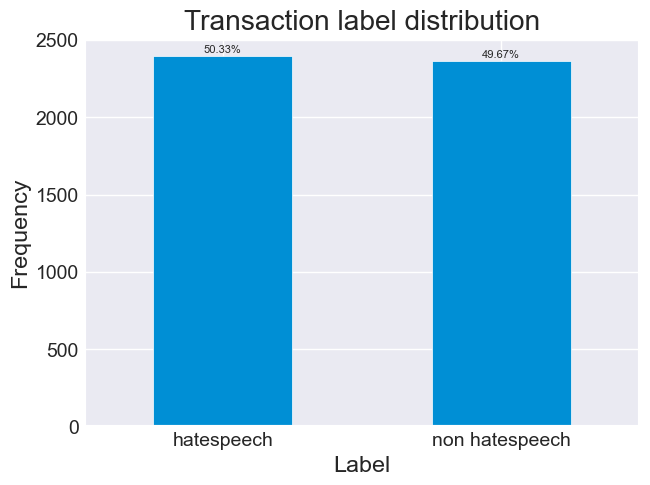

In [14]:
labels = ['hatespeech', 'non hatespeech']
classes = pd.value_counts(df['label_gold'], sort=True)
ax = classes.plot(kind='bar', rot=0)
plt.title("Transaction label distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency")

# Menambahkan persentase pada setiap bar
total_df = len(df)
for i, v in enumerate(classes):
    percentage = f"{(v / total_df * 100):.2f}%"
    ax.text(i, v + 10, percentage, ha='center', va='bottom', fontsize=8)

plt.show()

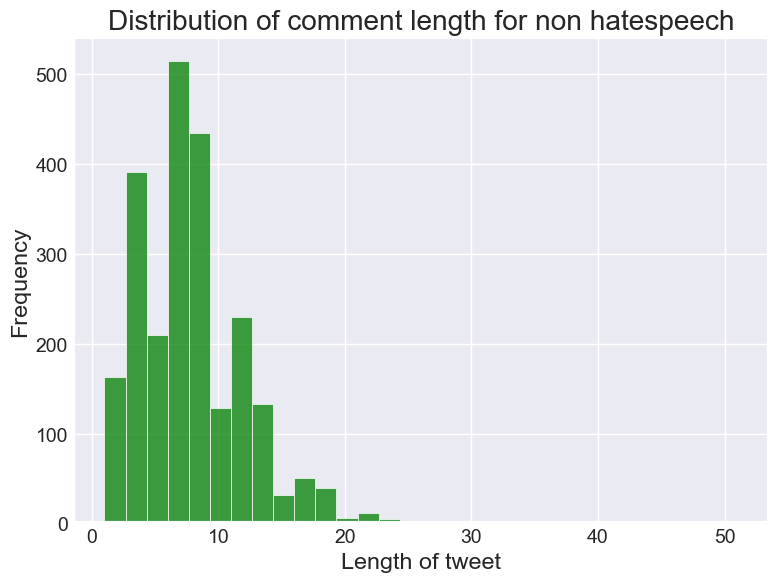

Statistical description for non hatespeech:
count    2363.000000
mean        7.772747
std         4.537499
min         1.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        51.000000
Name: Length, dtype: float64

Counts for each label type:
label_gold
1    2394
0    2363
Name: count, dtype: int64


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat kolom 'Length' untuk menyimpan panjang kata dalam setiap komentar
df["Length"] = df['text'].str.split().apply(lambda x: len(x) if isinstance(x, list) else None)

# Memvisualisasikan histogram panjang komentar untuk non hatespeech
plt.figure(figsize=(8, 6))
sns.histplot(df[df['label_gold'] == 0]['Length'].dropna(), color="g", bins=30)
plt.title("Distribution of comment length for non hatespeech")
plt.xlabel("Length of tweet")
plt.ylabel("Frequency")
plt.show()

# Melihat statistik deskriptif untuk panjang komentar non hatespeech
non_hate_stats = df[df['label_gold'] == 0]['Length'].describe()
print("Statistical description for non hatespeech:")
print(non_hate_stats)

# Melihat jumlah masing-masing tipe label
label_counts = df['label_gold'].value_counts()
print("\nCounts for each label type:")
print(label_counts)


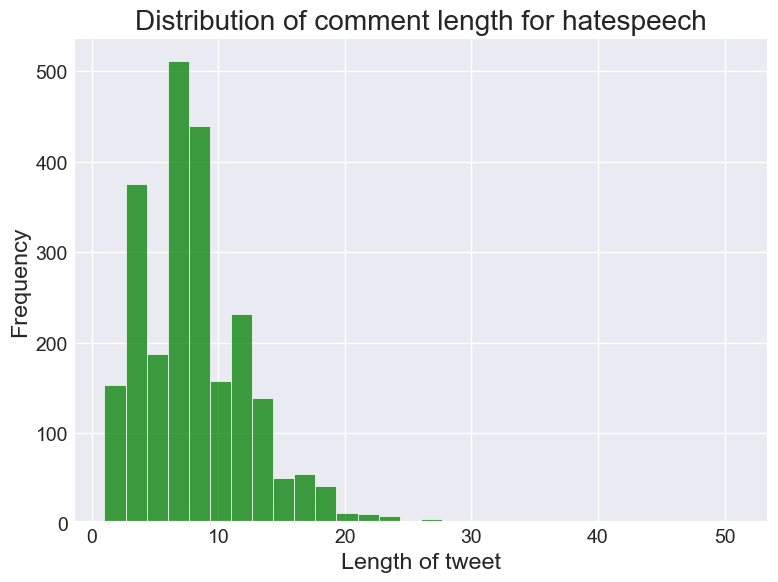

Statistical description for non hatespeech:
count    2394.000000
mean        8.082707
std         4.728731
min         1.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        51.000000
Name: Length, dtype: float64

Counts for each label type:
label_gold
1    2394
0    2363
Name: count, dtype: int64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat kolom 'Length' untuk menyimpan panjang kata dalam setiap komentar
df["Length"] = df['text'].str.split().apply(lambda x: len(x) if isinstance(x, list) else None)

# Memvisualisasikan histogram panjang komentar untuk non hatespeech
plt.figure(figsize=(8, 6))
sns.histplot(df[df['label_gold'] == 1]['Length'].dropna(), color="g", bins=30)
plt.title("Distribution of comment length for hatespeech")
plt.xlabel("Length of tweet")
plt.ylabel("Frequency")
plt.show()

# Melihat statistik deskriptif untuk panjang komentar non hatespeech
non_hate_stats = df[df['label_gold'] == 1]['Length'].describe()
print("Statistical description for non hatespeech:")
print(non_hate_stats)

# Melihat jumlah masing-masing tipe label
label_counts = df['label_gold'].value_counts()
print("\nCounts for each label type:")
print(label_counts)


In [17]:
# variabel untuk kolom Tweet
text = df.text
print(text.head())

0                  I would love to 🔪 some 👳🏾
1                  I would love to 🔪 some 👨🏿
2                     I would love to 🔪some🦊
3                               👳🏽 make me 🤢
4    literally all 👨🏿 men act like gentlemen
Name: text, dtype: object


---